# Medical device calibration software - Team 2
#Omar Essam              -       1210368
#Ahmed Taha              -       1210193
#Abdelrahman Hesham         -    1210148
#Khaled Zain            -        1220047
#Moamen Ehab            -        1210374


### Setup

In [2]:
%pip install pandas
%pip install seaborn
%pip install matplotlib
%pip install scikit-learn
%pip install numpy


Note: you may need to restart the kernel to use updated packages.
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split , GridSearchCV, cross_val_score
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score, mean_squared_error
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier



### Preprocessing the Data

In [5]:

FLIR = pd.read_csv('../data/FLIR_groups1and2.csv')
ICI = pd.read_csv('../data/ICI_groups1and2.csv')

FLIR.head()
ICI.head()

,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,aveAllL13_1,T_RC1,T_RC_Dry1,T_RC_Wet1,T_RC_Max1,T_LC1,...,T_FHRC4,T_FHLC4,T_FHBC4,T_FHTC4,T_FH_Max4,T_FHC_Max4,T_Max4,T_OR4,T_OR_Max4,aveOralM
0,-0.27,34.94,35.48,34.05,34.74,34.92,34.92,34.71,34.94,35.45,...,33.18,32.97,33.22,32.65,34.10,33.73,36.39,36.38,36.39,36.59
1,-0.21,33.56,34.93,33.23,34.14,34.80,33.97,34.80,34.89,34.88,...,33.86,33.44,33.67,33.52,34.36,34.17,36.30,36.28,36.30,37.19
2,-0.28,35.91,35.60,35.46,34.71,35.83,35.83,35.50,35.91,35.58,...,34.60,34.57,34.59,34.85,35.21,35.16,36.63,36.59,36.63,37.34
3,-0.32,35.25,35.46,33.78,33.88,35.24,35.20,35.22,35.25,35.60,...,33.97,34.21,33.97,34.07,35.27,34.34,35.88,35.55,35.57,37.09
4,-0.52,35.57,35.78,34.38,35.27,35.60,35.54,35.60,35.66,35.72,...,35.09,34.61,34.46,35.13,35.45,35.45,37.00,36.99,37.00,37.04


In [ ]:
categorical_features = ['T_offset1', 'Max1R13_1', 'Max1L13_1', 'aveAllR13_1', 'aveAllL13_1', 'T_RC1', 'T_RC_Dry1', 'T_RC_Wet1', 'T_RC_Max1', 'T_LC1', 'T_LC_Dry1', 'T_LC_Wet1', 'T_LC_Max1', 'RCC1', 'LCC1', 'canthiMax1', 'canthi4Max1', 'T_FHCC1', 'T_FHRC1', 'T_FHLC1', 'T_FHBC1', 'T_FHTC1', 'T_FH_Max1', 'T_FHC_Max1', 'T_Max1', 'T_OR1', 'T_OR_Max1', 'T_offset2', 'Max1R13_2', 'Max1L13_2', 'aveAllR13_2', 'aveAllL13_2', 'T_RC2', 'T_RC_Dry2', 'T_RC_Wet2', 'T_RC_Max2', 'T_LC2', 'T_LC_Dry2', 'T_LC_Wet2', 'T_LC_Max2', 'RCC2', 'LCC2', 'canthiMax2', 'canthi4Max2', 'T_FHCC2', 'T_FHRC2', 'T_FHLC2', 'T_FHBC2', 'T_FHTC2', 'T_FH_Max2', 'T_FHC_Max2', 'T_Max2', 'T_OR2', 'T_OR_Max2', 'T_offset3', 'Max1R13_3', 'Max1L13_3', 'aveAllR13_3', 'aveAllL13_3', 'T_RC3', 'T_RC_Dry3', 'T_RC_Wet3', 'T_RC_Max3', 'T_LC3', 'T_LC_Dry3', 'T_LC_Wet3', 'T_LC_Max3', 'RCC3', 'LCC3', 'canthiMax3', 'canthi4Max3', 'T_FHCC3', 'T_FHRC3', 'T_FHLC3', 'T_FHBC3', 'T_FHTC3', 'T_FH_Max3', 'T_FHC_Max3', 'T_Max3', 'T_OR3', 'T_OR_Max3', 'T_offset4', 'Max1R13_4', 'Max1L13_4', 'aveAllR13_4', 'aveAllL13_4', 'T_RC4', 'T_RC_Dry4', 'T_RC_Wet4', 'T_RC_Max4', 'T_LC14', 'T_LC_Dry4', 'T_LC_Wet4', 'T_LC_Max4', 'RCC4', 'LCC4', 'canthiMax4', 'canthi4Max4', 'T_FHCC4', 'T_FHRC4', 'T_FHLC4', 'T_FHBC4', 'T_FHTC4', 'T_FH_Max4', 'T_FHC_Max4', 'T_Max4', 'T_OR4', 'T_OR_Max4', 'aveOralM']

In [23]:
Y_FLIR = FLIR['aveOralM']
X_FLIR = FLIR.drop(['aveOralM', 'source_dataset'], axis=1, errors='ignore') # Drop 'source_dataset' as it's a string column

print("Shape of X_FLIR before preprocessing:", X_FLIR.shape)

# 2. Identify and drop any columns in X_FLIR that consist entirely of NaN values.
columns_all_nan_flir = X_FLIR.columns[X_FLIR.isnull().all()].tolist()
if columns_all_nan_flir:
    print(f"Dropping columns with all NaN values from X_FLIR: {columns_all_nan_flir}")
    X_FLIR = X_FLIR.drop(columns=columns_all_nan_flir)

# Re-define numerical features after dropping all-NaN columns and ensuring only numeric types
numerical_features_flir = X_FLIR.select_dtypes(include=np.number).columns.tolist()

print("Missing values in X_FLIR before handling:")
print(X_FLIR[numerical_features_flir].isnull().sum().sum()) # Check missing only in numerical

# 3. Impute any remaining missing values using the mean of that column.
for col in numerical_features_flir:
    if X_FLIR[col].isnull().any():
        X_FLIR[col] = X_FLIR[col].fillna(X_FLIR[col].mean())

print("Missing values in X_FLIR after handling:")
print(X_FLIR[numerical_features_flir].isnull().sum().sum())

# 4. Handle outliers using IQR method.
print("\n=====================")
print("Handling Outliers in X_FLIR:")
for col in numerical_features_flir:
    Q1 = X_FLIR[col].quantile(0.25)
    Q3 = X_FLIR[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    X_FLIR[col] = X_FLIR[col].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

# 5. Apply Min-Max scaling.
print("\n=====================")
print("Applying Feature Scaling (Min-Max Normalization) to X_FLIR:")
from sklearn.preprocessing import MinMaxScaler

scaler_flir = MinMaxScaler()
X_FLIR[numerical_features_flir] = scaler_flir.fit_transform(X_FLIR[numerical_features_flir])

# 6. Print the first few rows.
print("\nProcessed X_FLIR (first 5 rows):")
display(X_FLIR.head())
print("\nProcessed Y_FLIR (first 5 rows):")
display(Y_FLIR.head())

Shape of X_FLIR before preprocessing: (1020, 109)
Dropping columns with all NaN values from X_FLIR: ['Unnamed: 27']
Missing values in X_FLIR before handling:
1793
Missing values in X_FLIR after handling:
0

Handling Outliers in X_FLIR:

Applying Feature Scaling (Min-Max Normalization) to X_FLIR:

Processed X_FLIR (first 5 rows):


,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,aveAllL13_1,T_RC1,T_RC_Dry1,T_RC_Wet1,T_RC_Max1,T_LC1,...,T_FHCC4,T_FHRC4,T_FHLC4,T_FHBC4,T_FHTC4,T_FH_Max4,T_FHC_Max4,T_Max4,T_OR4,T_OR_Max4
0,0.253378,0.303030,0.436245,0.407842,0.485769,0.235656,0.278846,0.161290,0.258534,0.407258,...,0.197917,0.153571,0.114238,0.209459,0.000000,0.116071,0.098896,0.439516,0.451923,0.443548
1,0.422297,0.200758,0.094880,0.413204,0.298077,0.141393,0.190385,0.096774,0.150100,0.141129,...,0.312500,0.296429,0.190397,0.361486,0.230536,0.116071,0.235442,0.217742,0.240385,0.221774
2,0.435811,0.575758,0.468373,0.557976,0.464231,0.547131,0.571154,0.508065,0.547691,0.447581,...,0.586806,0.550000,0.538079,0.574324,0.614619,0.504464,0.552711,0.443548,0.451923,0.447581
3,0.469595,0.375000,0.492470,0.356903,0.531923,0.329918,0.367308,0.354839,0.334839,0.483871,...,0.406250,0.282143,0.498344,0.361486,0.476211,0.428571,0.476406,0.161290,0.000000,0.000000
4,0.591216,0.435606,0.512550,0.372989,0.575000,0.477459,0.428846,0.524194,0.475402,0.495968,...,0.687500,0.700000,0.511589,0.557432,0.618080,0.549107,0.661145,0.540323,0.551923,0.544355



Processed Y_FLIR (first 5 rows):


,aveOralM
0,36.59
1,37.19
2,37.34
3,37.09
4,37.04


In [24]:
Y_ICI = ICI['aveOralM']
X_ICI = ICI.drop(['aveOralM', 'source_dataset'], axis=1, errors='ignore') # Drop 'source_dataset' as it's a string column

print("Shape of X_ICI before preprocessing:", X_ICI.shape)

# 2. Identify and drop any columns in X_ICI that consist entirely of NaN values.
columns_all_nan_ici = X_ICI.columns[X_ICI.isnull().all()].tolist()
if columns_all_nan_ici:
    print(f"Dropping columns with all NaN values from X_ICI: {columns_all_nan_ici}")
    X_ICI = X_ICI.drop(columns=columns_all_nan_ici)

# Re-define numerical features after dropping all-NaN columns and ensuring only numeric types
numerical_features_ici = X_ICI.select_dtypes(include=np.number).columns.tolist()

print("Missing values in X_ICI before handling:")
print(X_ICI[numerical_features_ici].isnull().sum().sum()) # Check missing only in numerical

# 3. Impute any remaining missing values using the mean of that column.
for col in numerical_features_ici:
    if X_ICI[col].isnull().any():
        X_ICI[col] = X_ICI[col].fillna(X_ICI[col].mean())

print("Missing values in X_ICI after handling:")
print(X_ICI[numerical_features_ici].isnull().sum().sum())

# 4. Handle outliers using IQR method.
print("\n=====================")
print("Handling Outliers in X_ICI:")
for col in numerical_features_ici:
    Q1 = X_ICI[col].quantile(0.25)
    Q3 = X_ICI[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    X_ICI[col] = X_ICI[col].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

# 5. Apply Min-Max scaling.
print("\n=====================")
print("Applying Feature Scaling (Min-Max Normalization) to X_ICI:")
from sklearn.preprocessing import MinMaxScaler

scaler_ici = MinMaxScaler()
X_ICI[numerical_features_ici] = scaler_ici.fit_transform(X_ICI[numerical_features_ici])

# 6. Print the first few rows.
print("\nProcessed X_ICI (first 5 rows):")
display(X_ICI.head())
print("\nProcessed Y_ICI (first 5 rows):")
display(Y_ICI.head())

Shape of X_ICI before preprocessing: (1009, 108)
Missing values in X_ICI before handling:
11563
Missing values in X_ICI after handling:
0

Handling Outliers in X_ICI:

Applying Feature Scaling (Min-Max Normalization) to X_ICI:

Processed X_ICI (first 5 rows):


,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,aveAllL13_1,T_RC1,T_RC_Dry1,T_RC_Wet1,T_RC_Max1,T_LC1,...,T_FHCC4,T_FHRC4,T_FHLC4,T_FHBC4,T_FHTC4,T_FH_Max4,T_FHC_Max4,T_Max4,T_OR4,T_OR_Max4
0,0.535,0.343750,0.519366,0.390351,0.484551,0.298913,0.332143,0.261364,0.295290,0.494231,...,0.118151,0.072917,0.020270,0.100000,0.000000,0.000000,0.023437,0.420775,0.442568,0.433219
1,0.595,0.000000,0.325704,0.210526,0.316011,0.255435,0.000000,0.295455,0.277174,0.275000,...,0.234589,0.309028,0.179054,0.260714,0.184211,0.103070,0.195312,0.389085,0.408784,0.402397
2,0.525,0.680556,0.561620,0.699561,0.476124,0.628623,0.657143,0.560606,0.646739,0.544231,...,0.590753,0.565972,0.560811,0.589286,0.621711,0.475877,0.582031,0.505282,0.513514,0.515411
3,0.485,0.451389,0.512324,0.331140,0.242978,0.414855,0.432143,0.454545,0.407609,0.551923,...,0.268836,0.347222,0.439189,0.367857,0.365132,0.502193,0.261719,0.241197,0.162162,0.152397
4,0.285,0.562500,0.625000,0.462719,0.633427,0.545290,0.553571,0.598485,0.556159,0.598077,...,0.700342,0.736111,0.574324,0.542857,0.713816,0.581140,0.695312,0.635563,0.648649,0.642123



Processed Y_ICI (first 5 rows):


,aveOralM
0,36.59
1,37.19
2,37.34
3,37.09
4,37.04


## Split Data into Training and Test Sets for FLIR and ICI


In [25]:
from sklearn.model_selection import train_test_split

X_FLIR_train, X_FLIR_test, Y_FLIR_train, Y_FLIR_test = train_test_split(X_FLIR, Y_FLIR, test_size=0.2, random_state=42)
X_ICI_train, X_ICI_test, Y_ICI_train, Y_ICI_test = train_test_split(X_ICI, Y_ICI, test_size=0.2, random_state=42)

print("Shape of X_FLIR_train:", X_FLIR_train.shape)
print("Shape of Y_FLIR_train:", Y_FLIR_train.shape)
print("Shape of X_FLIR_test:", X_FLIR_test.shape)
print("Shape of Y_FLIR_test:", Y_FLIR_test.shape)
print("\nShape of X_ICI_train:", X_ICI_train.shape)
print("Shape of Y_ICI_train:", Y_ICI_train.shape)
print("Shape of X_ICI_test:", X_ICI_test.shape)
print("Shape of Y_ICI_test:", Y_ICI_test.shape)

Shape of X_FLIR_train: (816, 108)
Shape of Y_FLIR_train: (816,)
Shape of X_FLIR_test: (204, 108)
Shape of Y_FLIR_test: (204,)

Shape of X_ICI_train: (807, 108)
Shape of Y_ICI_train: (807,)
Shape of X_ICI_test: (202, 108)
Shape of Y_ICI_test: (202,)


In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# 2. Define a hyperparameter grid for the RandomForestRegressor
rf_flir_params = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10]
}

# 3. Instantiate a RandomForestRegressor
rf_flir = RandomForestRegressor(random_state=42)

# 4. Initialize GridSearchCV
rf_flir_grid = GridSearchCV(rf_flir, rf_flir_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# 5. Fit GridSearchCV to X_FLIR_train and Y_FLIR_train
rf_flir_grid.fit(X_FLIR_train, Y_FLIR_train)

# 6. Print the best hyperparameters found by GridSearchCV
print("Best Random Forest Regressor params for FLIR:", rf_flir_grid.best_params_)

# 7. Retrieve the best estimator (model)
best_rf_flir = rf_flir_grid.best_estimator_

# 8. Make predictions on X_FLIR_test using the best model
flir_predictions = best_rf_flir.predict(X_FLIR_test)

# 9. Calculate the Root Mean Squared Error (RMSE) and print the result
flir_rmse = np.sqrt(mean_squared_error(Y_FLIR_test, flir_predictions))
print(f"Random Forest Regressor RMSE for FLIR: {flir_rmse:.3f}")

Best Random Forest Regressor params for FLIR: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 300}
Random Forest Regressor RMSE for FLIR: 0.225


In [28]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# 2. Define a hyperparameter grid for GradientBoostingRegressor with fewer options
gbt_flir_params = {
    "n_estimators": [50, 100],
    "learning_rate": [0.05, 0.1],
    "max_depth": [3, 5]
}

# 3. Instantiate a GradientBoostingRegressor
gbt_flir = GradientBoostingRegressor(random_state=42)

# 4. Initialize GridSearchCV
gbt_flir_grid = GridSearchCV(gbt_flir, gbt_flir_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# 5. Fit GridSearchCV to X_FLIR_train and Y_FLIR_train
gbt_flir_grid.fit(X_FLIR_train, Y_FLIR_train)

# 6. Print the best hyperparameters found by GridSearchCV
print("Best Gradient Boosting Regressor params for FLIR:", gbt_flir_grid.best_params_)

# 7. Retrieve the best estimator (model)
best_gbt_flir = gbt_flir_grid.best_estimator_

# 8. Make predictions on X_FLIR_test using the best model
flir_gbt_predictions = best_gbt_flir.predict(X_FLIR_test)

# 9. Calculate the Root Mean Squared Error (RMSE) and print the result
flir_gbt_rmse = np.sqrt(mean_squared_error(Y_FLIR_test, flir_gbt_predictions))
print(f"Gradient Boosting Regressor RMSE for FLIR: {flir_gbt_rmse:.3f}")

Best Gradient Boosting Regressor params for FLIR: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Gradient Boosting Regressor RMSE for FLIR: 0.224


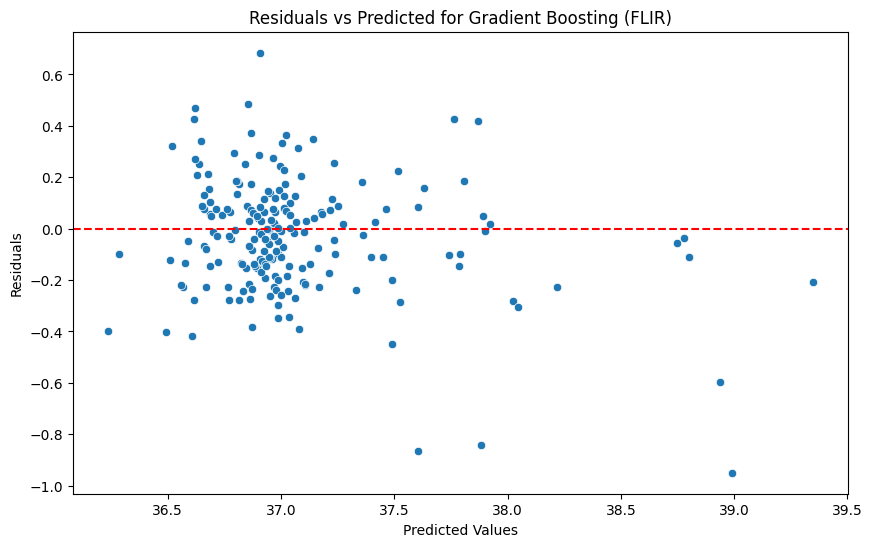

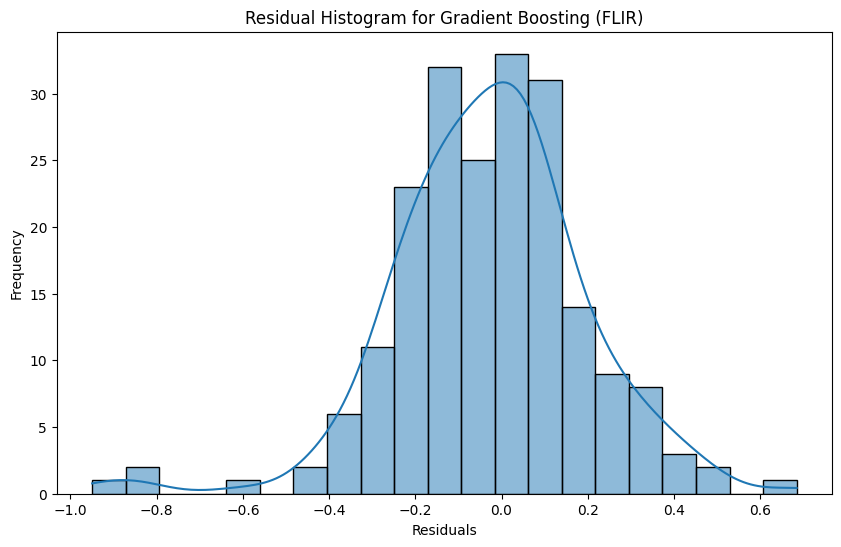

<Figure size 1000x600 with 0 Axes>

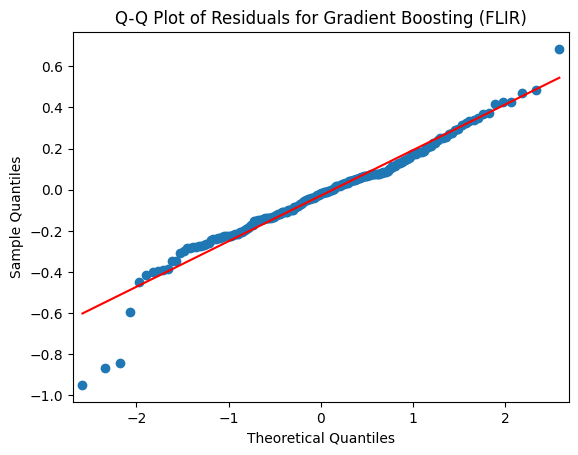

In [34]:
# Using the best_gbt_flir model for demonstration
predictions_flir = best_gbt_flir.predict(X_FLIR_test)
residuals_flir = Y_FLIR_test - predictions_flir

# 1. Residuals vs Predicted Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=predictions_flir, y=residuals_flir)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted for Gradient Boosting (FLIR)')
plt.show()

# 2. Residual Histogram
plt.figure(figsize=(10, 6))
sns.histplot(residuals_flir, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Histogram for Gradient Boosting (FLIR)')
plt.show()

# 3. Q-Q Plot
import statsmodels.api as sm
plt.figure(figsize=(10, 6))
sm.qqplot(residuals_flir, line='s')
plt.title('Q-Q Plot of Residuals for Gradient Boosting (FLIR)')
plt.show()


In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# 2. Define a hyperparameter grid for the RandomForestRegressor
rf_ici_params = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10]
}

# 3. Instantiate a RandomForestRegressor
rf_ici = RandomForestRegressor(random_state=42)

# 4. Initialize GridSearchCV
rf_ici_grid = GridSearchCV(rf_ici, rf_ici_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# 5. Fit GridSearchCV to X_ICI_train and Y_ICI_train
rf_ici_grid.fit(X_ICI_train, Y_ICI_train)

# 6. Print the best hyperparameters found by GridSearchCV
print("Best Random Forest Regressor params for ICI:", rf_ici_grid.best_params_)

# 7. Retrieve the best estimator (model)
best_rf_ici = rf_ici_grid.best_estimator_

# 8. Make predictions on X_ICI_test using the best model
ici_predictions = best_rf_ici.predict(X_ICI_test)

# 9. Calculate the Root Mean Squared Error (RMSE) and print the result
ici_rmse = np.sqrt(mean_squared_error(Y_ICI_test, ici_predictions))
print(f"Random Forest Regressor RMSE for ICI: {ici_rmse:.3f}")

Best Random Forest Regressor params for ICI: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 300}
Random Forest Regressor RMSE for ICI: 0.252


In [30]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# 2. Define a hyperparameter grid for GradientBoostingRegressor with fewer options
gbt_ici_params = {
    "n_estimators": [50, 100],
    "learning_rate": [0.05, 0.1],
    "max_depth": [3, 5]
}

# 3. Instantiate a GradientBoostingRegressor
gbt_ici = GradientBoostingRegressor(random_state=42)

# 4. Initialize GridSearchCV
gbt_ici_grid = GridSearchCV(gbt_ici, gbt_ici_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# 5. Fit GridSearchCV to X_ICI_train and Y_ICI_train
gbt_ici_grid.fit(X_ICI_train, Y_ICI_train)

# 6. Print the best hyperparameters found by GridSearchCV
print("Best Gradient Boosting Regressor params for ICI:", gbt_ici_grid.best_params_)

# 7. Retrieve the best estimator (model)
best_gbt_ici = gbt_ici_grid.best_estimator_

# 8. Make predictions on X_ICI_test using the best model
ici_gbt_predictions = best_gbt_ici.predict(X_ICI_test)

# 9. Calculate the Root Mean Squared Error (RMSE) and print the result
ici_gbt_rmse = np.sqrt(mean_squared_error(Y_ICI_test, ici_gbt_predictions))
print(f"Gradient Boosting Regressor RMSE for ICI: {ici_gbt_rmse:.3f}")

Best Gradient Boosting Regressor params for ICI: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Gradient Boosting Regressor RMSE for ICI: 0.264


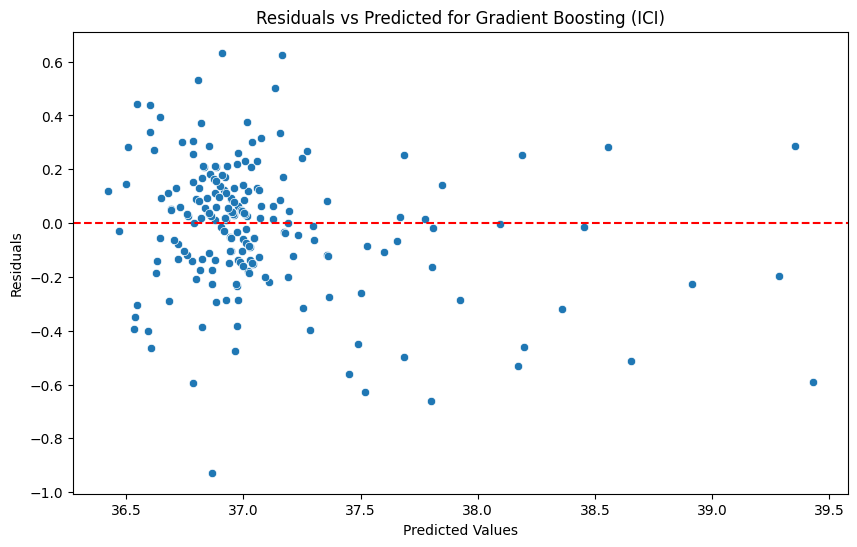

In [41]:
# Using the best_gbt_flir model for demonstration
predictions_ICI = best_gbt_flir.predict(X_ICI_test)
residuals_ICI = Y_ICI_test - predictions_ICI

# 1. Residuals vs Predicted Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=predictions_ICI, y=residuals_ICI)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted for Gradient Boosting (ICI)')
plt.show()




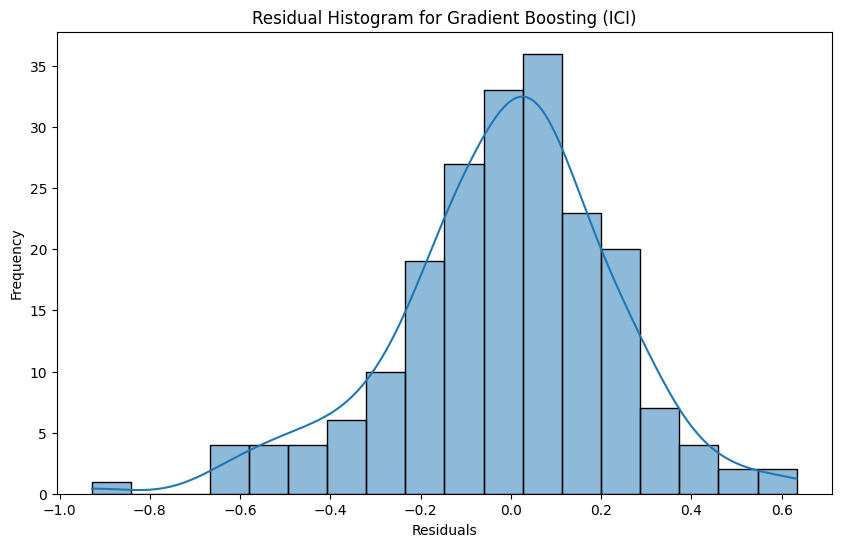

In [42]:
# 2. Residual Histogram
plt.figure(figsize=(10, 6))
sns.histplot(residuals_ICI, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Histogram for Gradient Boosting (ICI)')
plt.show()

<Figure size 1000x600 with 0 Axes>

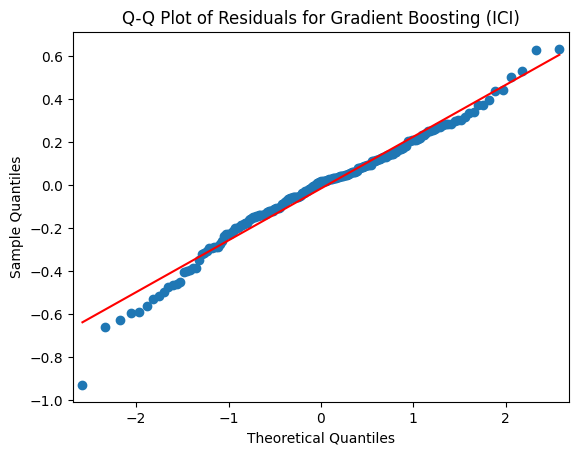

In [43]:

# 3. Q-Q Plot
import statsmodels.api as sm
plt.figure(figsize=(10, 6))
sm.qqplot(residuals_ICI, line='s')
plt.title('Q-Q Plot of Residuals for Gradient Boosting (ICI)')
plt.show()

In [31]:
results = {
    'Model': [
        'Random Forest Regressor (FLIR)',
        'Gradient Boosting Regressor (FLIR)',
        'Random Forest Regressor (ICI)',
        'Gradient Boosting Regressor (ICI)'
    ],
    'RMSE': [
        flir_rmse,
        flir_gbt_rmse,
        ici_rmse,
        ici_gbt_rmse
    ]
}

results_df = pd.DataFrame(results)
print("Model Performance Comparison (RMSE):")
display(results_df)

Model Performance Comparison (RMSE):


,Model,RMSE
0,Random Forest Regressor (FLIR),0.225100
1,Gradient Boosting Regressor (FLIR),0.223689
2,Random Forest Regressor (ICI),0.252444
3,Gradient Boosting Regressor (ICI),0.264172


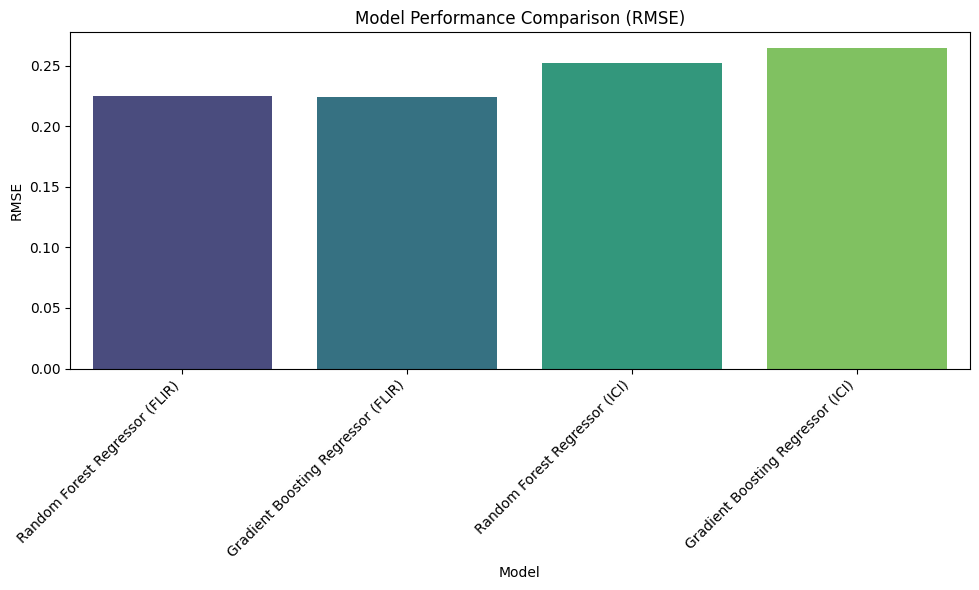

In [33]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='RMSE', data=results_df, palette='viridis', hue='Model', legend=False)
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('Model Performance Comparison (RMSE)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# evaluate FLIR for R2, MAE and MAPE

In [44]:
from sklearn.metrics import r2_score, mean_absolute_error
import numpy as np

def evaluate_model(model, X_test, y_test):
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    mape = np.mean(np.abs((y_test - preds) / (y_test + 1e-6))) * 100
    return r2, mae, mape

rf_r2, rf_mae, rf_mape = evaluate_model(best_rf_flir, X_FLIR_test, Y_FLIR_test)
gb_r2, gb_mae, gb_mape = evaluate_model(best_gbt_flir, X_FLIR_test, Y_FLIR_test)

print("Random Forest:", rf_r2, rf_mae, rf_mape)
print("Gradient Boosting:", gb_r2, gb_mae, gb_mape)


Random Forest: 0.7593687910524762 0.17140918191677584 0.46273798255475446
Gradient Boosting: 0.7623772451168414 0.16569391941568945 0.44714629892418273


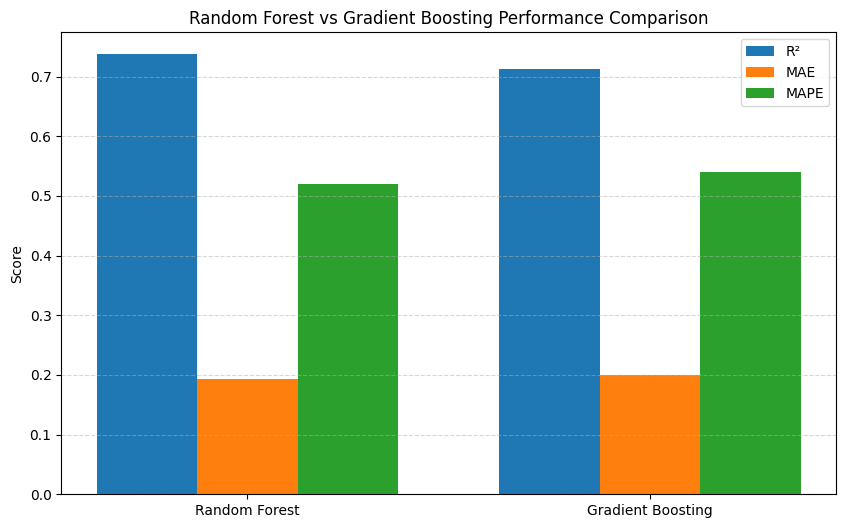

In [47]:
import matplotlib.pyplot as plt
import numpy as np

models = ["Random Forest", "Gradient Boosting"]

r2_scores = [rf_r2, gb_r2]
mae_scores = [rf_mae, gb_mae]
mape_scores = [rf_mape, gb_mape]

x = np.arange(len(models))
width = 0.25

plt.figure(figsize=(10,6))

plt.bar(x - width, r2_scores, width, label="R²")
plt.bar(x, mae_scores, width, label="MAE")
plt.bar(x + width, mape_scores, width, label="MAPE")

plt.xticks(x, models)
plt.ylabel("Score")
plt.title("Random Forest vs Gradient Boosting Performance Comparison")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


# evaluate ICI for R2, MAE and MAPE

In [46]:
rf_r2, rf_mae, rf_mape = evaluate_model(best_rf_ici, X_ICI_test, Y_ICI_test)
gb_r2, gb_mae, gb_mape = evaluate_model(best_gbt_ici, X_ICI_test, Y_ICI_test)
print("Random Forest:", rf_r2, rf_mae, rf_mape)
print("Gradient Boosting:", gb_r2, gb_mae, gb_mape)

Random Forest: 0.7372610095743419 0.19290425826081206 0.5196964130749158
Gradient Boosting: 0.712281708745209 0.20025308078114182 0.5393565191379941


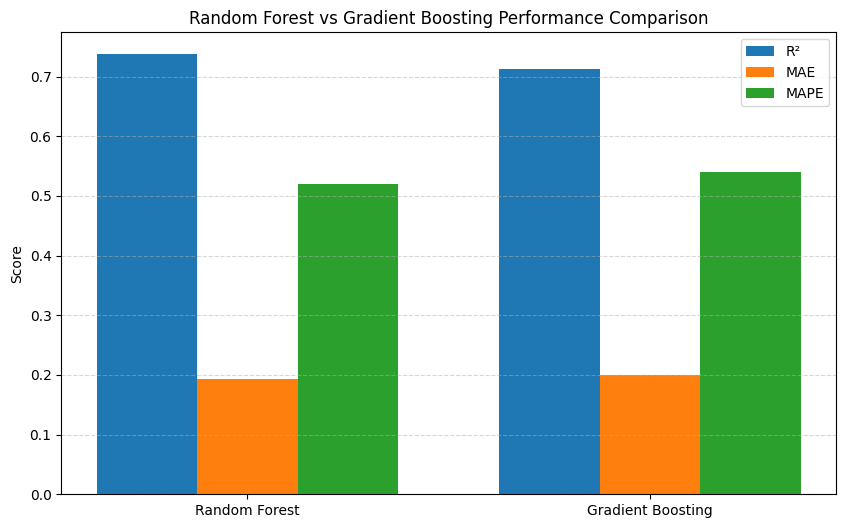

In [48]:
import matplotlib.pyplot as plt
import numpy as np

models = ["Random Forest", "Gradient Boosting"]

r2_scores = [rf_r2, gb_r2]
mae_scores = [rf_mae, gb_mae]
mape_scores = [rf_mape, gb_mape]

x = np.arange(len(models))
width = 0.25

plt.figure(figsize=(10,6))

plt.bar(x - width, r2_scores, width, label="R²")
plt.bar(x, mae_scores, width, label="MAE")
plt.bar(x + width, mape_scores, width, label="MAPE")

plt.xticks(x, models)
plt.ylabel("Score")
plt.title("Random Forest vs Gradient Boosting Performance Comparison")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


# FLIR Dataset Performance Comparison:
Looking at the bar chart for the FLIR dataset (the first comparison plot), we can observe:


*   R² (R-squared): Both Random Forest and Gradient Boosting show very similar R² scores, around 0.76. This indicates that both models explain approximately 76% of the variance in the aveOralM (average oral temperature) for the FLIR data. Gradient Boosting has a slightly higher R² (0.762) than Random Forest (0.759).
*   MAE (Mean Absolute Error): Gradient Boosting has a slightly lower MAE (approximately 0.166) compared to Random Forest (approximately 0.171). This means, on average, the Gradient Boosting model's predictions are closer to the actual oral temperatures by a small margin.

*   MAPE (Mean Absolute Percentage Error): Similarly, Gradient Boosting has a slightly lower MAPE (approximately 0.447%) than Random Forest (approximately 0.463%). This suggests that the percentage error of Gradient Boosting's predictions is marginally smaller on average.

# Conclusion for FLIR:
 For the FLIR dataset, both models perform quite well, explaining a significant portion of the variance. Gradient Boosting Regressor shows a very slight edge over Random Forest Regressor across all three metrics (higher R², lower MAE, lower MAPE), indicating it's a marginally better model for this dataset.

#ICI Dataset Performance Comparison:
Now, let's look at the bar chart for the ICI dataset (the second comparison plot):


*  R² (R-squared): Here, Random Forest has a higher R² score (approximately 0.737) compared to Gradient Boosting (approximately 0.712). This suggests that the Random Forest model explains a larger proportion of the variance in the aveOralM for the ICI data.
*  MAE (Mean Absolute Error): Random Forest exhibits a lower MAE (approximately 0.193) than Gradient Boosting (approximately 0.200). This means, on average, the Random Forest model's predictions are closer to the actual oral temperatures for the ICI data.

* MAPE (Mean Absolute Percentage Error): Consistently, Random Forest also has a lower MAPE (approximately 0.520%) compared to Gradient Boosting (approximately 0.539%). This indicates that the Random Forest's percentage errors are smaller on average for this dataset.

#Conclusion for ICI:
For the ICI dataset, Random Forest Regressor performs better than Gradient Boosting Regressor across all three metrics (higher R², lower MAE, lower MAPE).